In [1]:
import mytry
import matplotlib.pyplot as plt
import os
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
EPOCH = 1000
TARGET_CATEGORY = '일반의원'

filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"
savepath = os.path.join('./log', TARGET_CATEGORY)

In [23]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category=TARGET_CATEGORY, 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (759, 30), accumulate : (759, 30)
[train] 2017_2 : (759, 30), accumulate : (1518, 30)
[train] 2017_3 : (759, 30), accumulate : (2277, 30)
[train] 2017_4 : (759, 30), accumulate : (3036, 30)
[train] 2018_1 : (759, 30), accumulate : (3795, 30)
[train] 2018_2 : (759, 30), accumulate : (4554, 30)
[train] 2018_3 : (759, 30), accumulate : (5313, 30)
[test] 2019_1 : (759, 30), accumulate : (759, 30)
[test] 2019_2 : (759, 30), accumulate : (1518, 30)
[test] 2019_3 : (759, 30), accumulate : (2277, 30)
[test] 2018_4 : (759, 30), accumulate : (3036, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.79 0.1  0.08 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca ratios [0.79 0.1  0.08 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca top-3


In [24]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [25]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 1680364248.871356
R2 : 0.743417
----------------------------
[797212.67903891] 2505
평균 오차 318%
최대 오차 66745%
최소 오차 0%


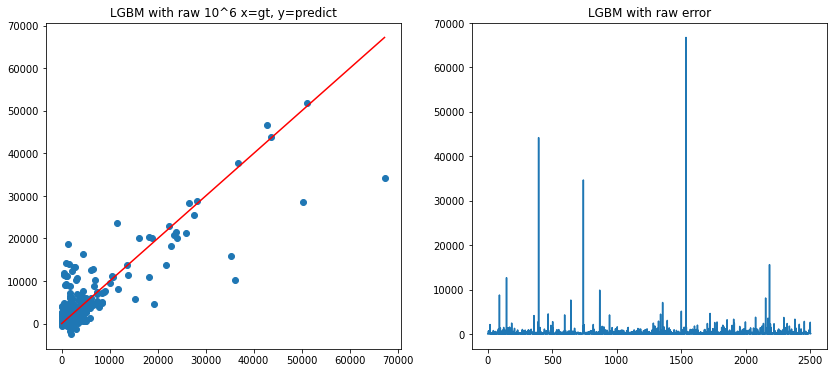

In [26]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw', savepath=savepath)

In [27]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [28]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std
)

In [29]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [30]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

...................../log/일반의원/4-MLP_raw-epoch:0999-val_mse:8861411159723474944.0000.hdf5 saved


In [31]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

.
Epoch 00026: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00036: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/일반의원/4-MLP_minmax-epoch:0999-val_mse:0.0019.hdf5 saved


In [32]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

...................../log/일반의원/4-MLP_std-epoch:0999-val_mse:0.5073.hdf5 saved


In [33]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH
)

.....
Epoch 00247: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00257: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00267: ReduceLROnPlateau reducing learning rate to 1e-06.
./log/일반의원/4-MLP_pca-epoch:0295-val_mse:0.6575.hdf5 saved


## 5-MLP [24, 12, 6, 1]

In [34]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

....
Epoch 00173: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00183: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00193: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/일반의원/5-MLP_raw-epoch:0212-val_mse:nan.hdf5 saved


In [35]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

.
Epoch 00035: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00045: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
.
Epoch 00055: ReduceLROnPlateau reducing learning rate to 1e-06.
.................../log/일반의원/5-MLP_minmax-epoch:0999-val_mse:0.0015.hdf5 saved


In [36]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

.......
Epoch 00343: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00372: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00383: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/일반의원/5-MLP_std-epoch:0424-val_mse:0.2477.hdf5 saved


In [37]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH
)

.....
Epoch 00233: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00294: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
.
Epoch 00304: ReduceLROnPlateau reducing learning rate to 1e-06.
............../log/일반의원/5-MLP_pca-epoch:0999-val_mse:0.5894.hdf5 saved


# Evaluate

## LGBM

------- evaluate LGBM with raw -------
RMSE : 1680364248.871356
R2 : 0.743417
----------------------------
[797212.67903891] 2505
평균 오차 318%
최대 오차 66745%
최소 오차 0%


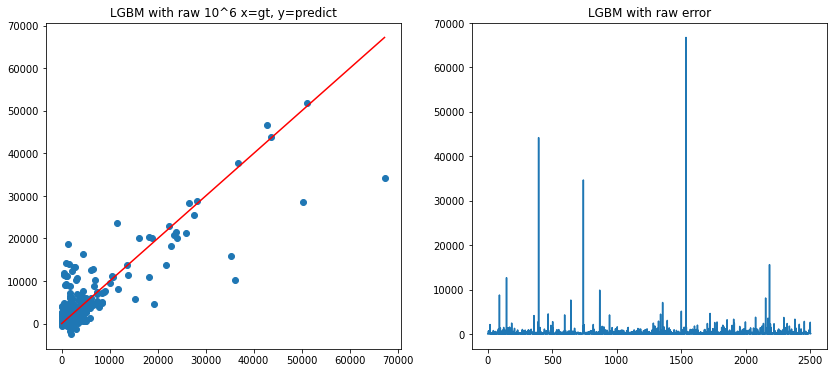

In [38]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='LGBM with raw', savepath=savepath)

------- evaluate LGBM with minmax norm -------
RMSE : 1680364241.223176
R2 : 0.743417
----------------------------
[797212.67991054] 2505
평균 오차 318%
최대 오차 66745%
최소 오차 0%


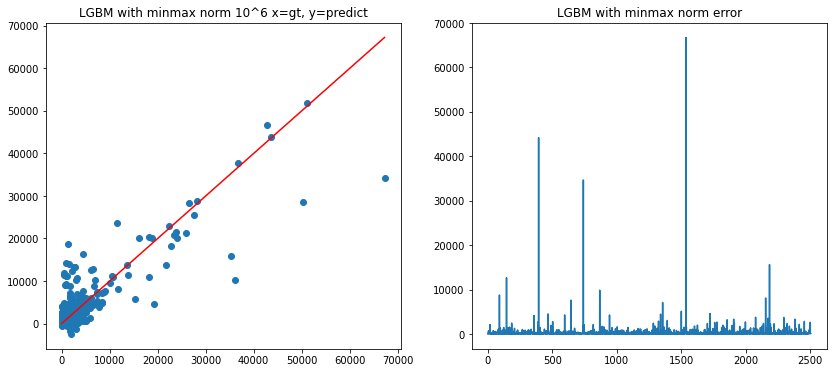

In [39]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='LGBM with minmax norm', savepath=savepath)

------- evaluate LGBM with std norm -------
RMSE : 1816238675.685787
R2 : 0.700244
----------------------------
[786291.37529233] 2505
평균 오차 314%
최대 오차 69223%
최소 오차 0%


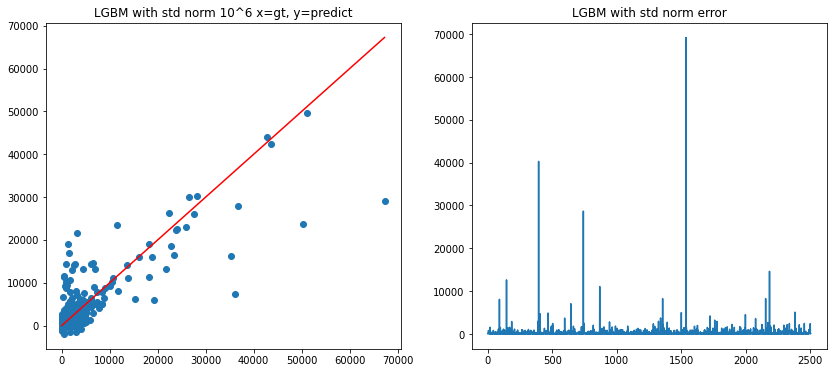

In [40]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='LGBM with std norm', savepath=savepath)

------- evaluate LGBM with PCA -------
RMSE : 2251737201.531557
R2 : 0.539259
----------------------------
[935592.66918395] 2505
평균 오차 373%
최대 오차 112085%
최소 오차 0%


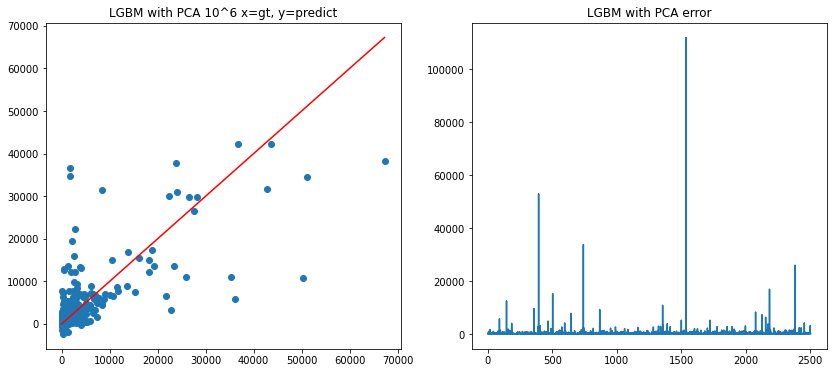

In [41]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='LGBM with PCA', savepath=savepath)

## 4-MLP

------- evaluate 4-MLP with raw -------
RMSE : 2976811947.148812
R2 : 0.194762
----------------------------
[987430.50548136] 2505
평균 오차 394%
최대 오차 115808%
최소 오차 0%


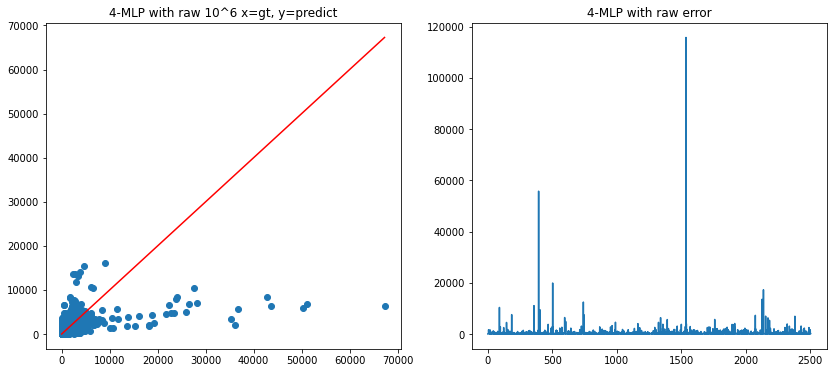

In [42]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='4-MLP with raw', savepath=savepath)

------- evaluate 4-MLP with minmax norm -------
RMSE : 2659555495.514637
R2 : 0.357254
----------------------------
[959842.37094906] 2505
평균 오차 383%
최대 오차 23135%
최소 오차 0%


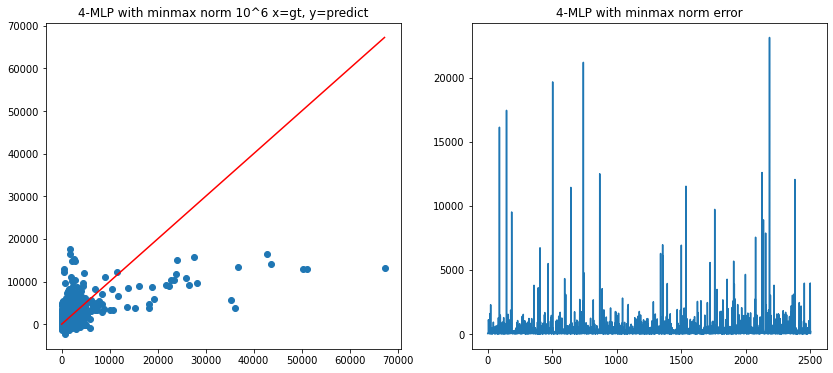

In [43]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='4-MLP with minmax norm', savepath=savepath)

------- evaluate 4-MLP with std -------
RMSE : 2265925037.353569
R2 : 0.533435
----------------------------
[949417.05077377] 2505
평균 오차 379%
최대 오차 96527%
최소 오차 0%


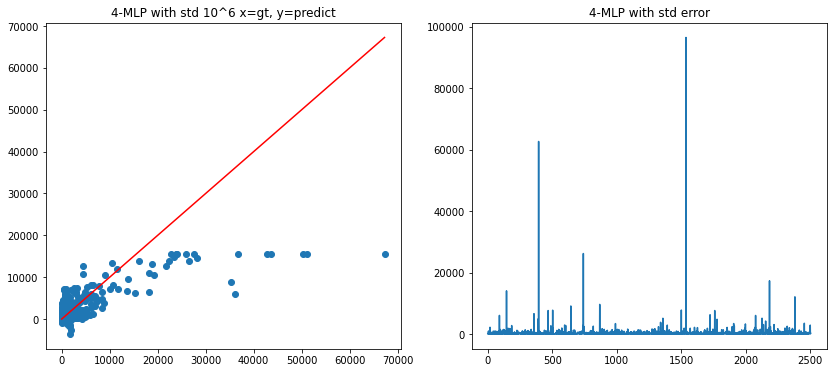

In [44]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='4-MLP with std', savepath=savepath)

------- evaluate 4-MLP with PCA -------
RMSE : 2579382515.281065
R2 : 0.395421
----------------------------
[896790.35256299] 2505
평균 오차 358%
최대 오차 93293%
최소 오차 0%


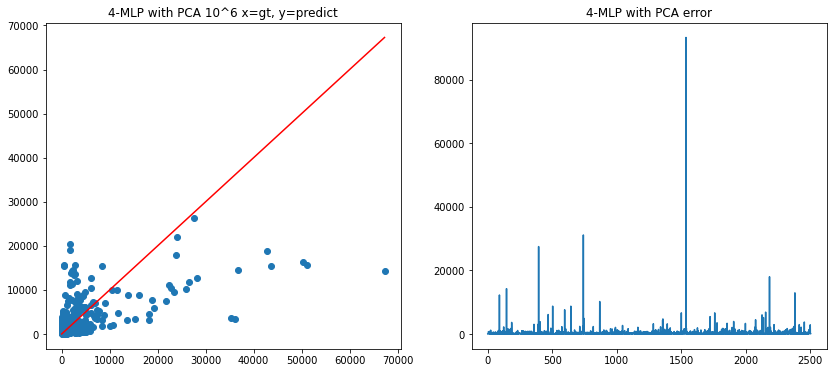

In [45]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='4-MLP with PCA', savepath=savepath)

# 5-MLP

------- evaluate 5-MLP with raw -------
RMSE : 3041862056.076273
R2 : 0.159185
----------------------------
[760159.03728947] 2505
평균 오차 303%
최대 오차 90848%
최소 오차 0%


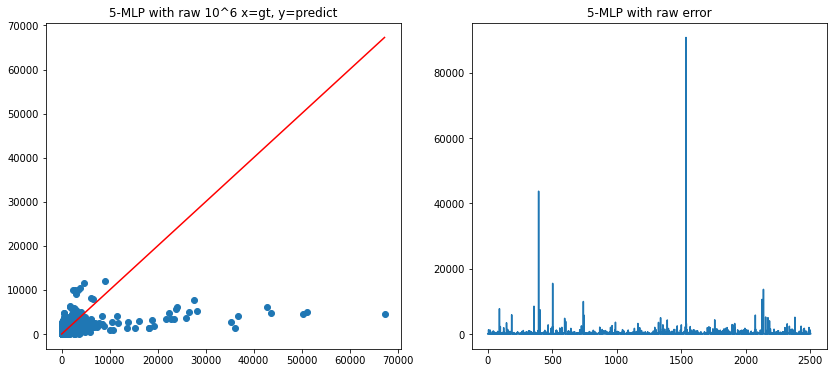

In [46]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='5-MLP with raw', savepath=savepath)

------- evaluate 5-MLP with minmax norm -------
RMSE : 2377314140.133472
R2 : 0.486436
----------------------------
[985358.90557401] 2505
평균 오차 393%
최대 오차 116781%
최소 오차 0%


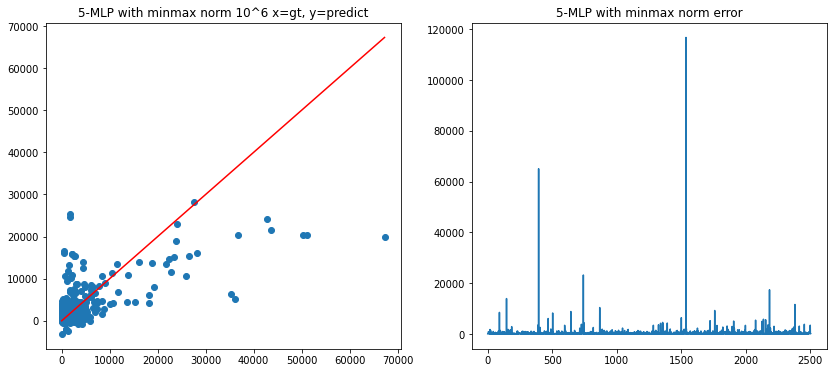

In [47]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='5-MLP with minmax norm', savepath=savepath)

------- evaluate 5-MLP with std norm -------
RMSE : 1583088548.605339
R2 : 0.772264
----------------------------
[810234.48748819] 2505
평균 오차 323%
최대 오차 59534%
최소 오차 0%


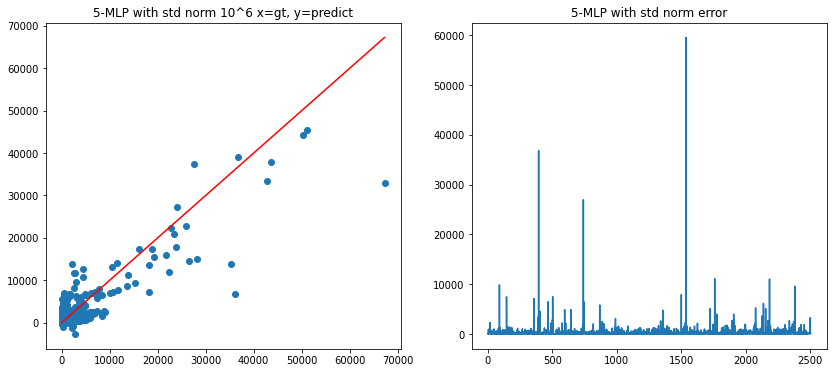

In [48]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='5-MLP with std norm', savepath=savepath)

------- evaluate 5-MLP with PCA -------
RMSE : 2442465647.277697
R2 : 0.457901
----------------------------
[919072.80100505] 2505
평균 오차 367%
최대 오차 98530%
최소 오차 0%


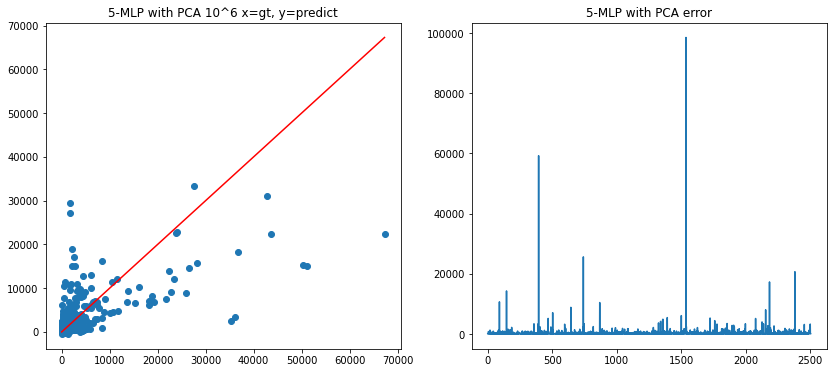

In [49]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='5-MLP with PCA', savepath=savepath)

# Appendix - MLP training history

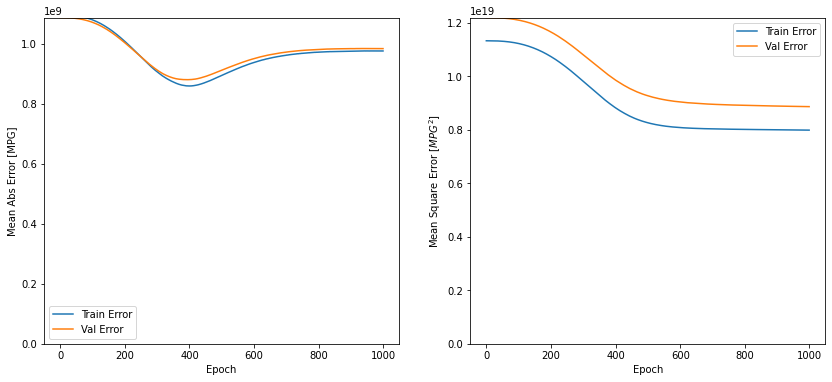

In [50]:
my_MLP.plot_history(hist_4MLP_raw)

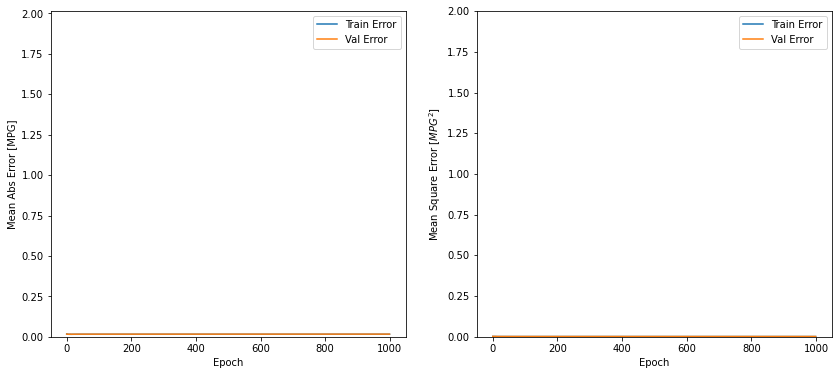

In [51]:
my_MLP.plot_history(hist_4MLP_minmax)

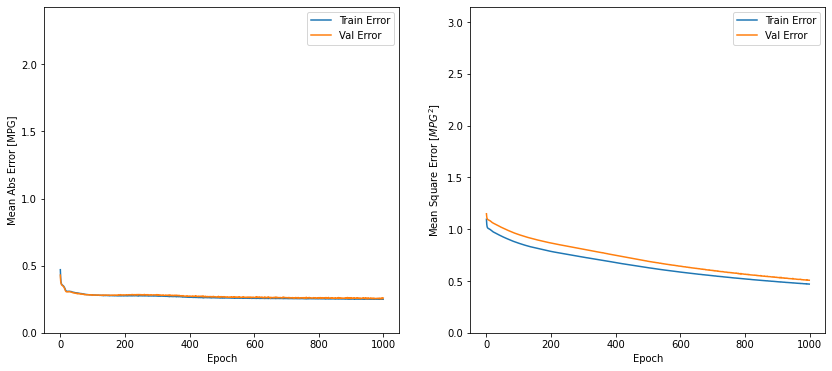

In [52]:
my_MLP.plot_history(hist_4MLP_std)

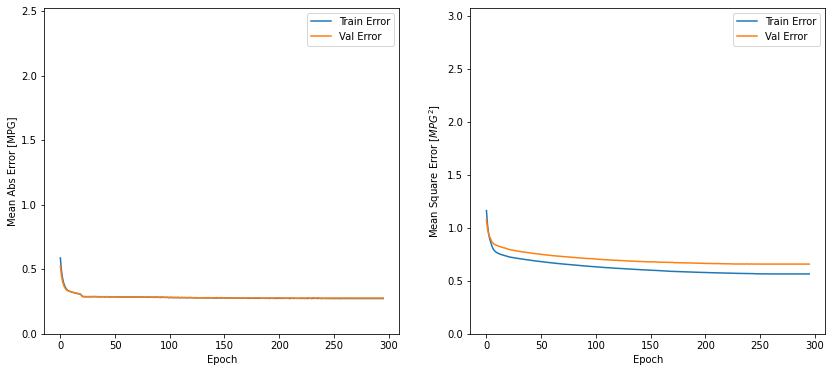

In [53]:
my_MLP.plot_history(hist_4MLP_pca)

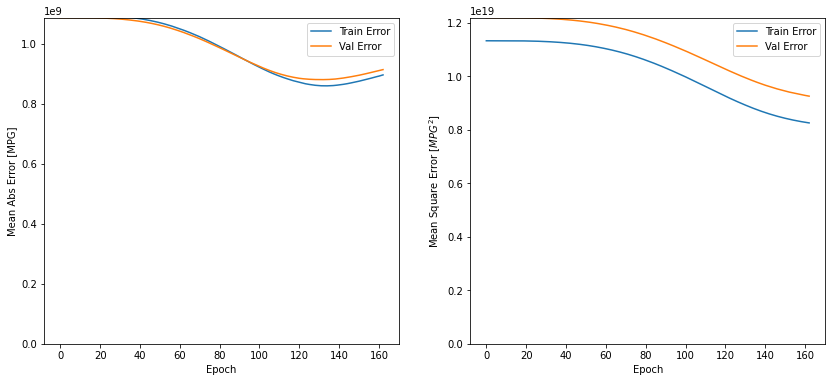

In [54]:
my_MLP.plot_history(hist_5MLP_raw)

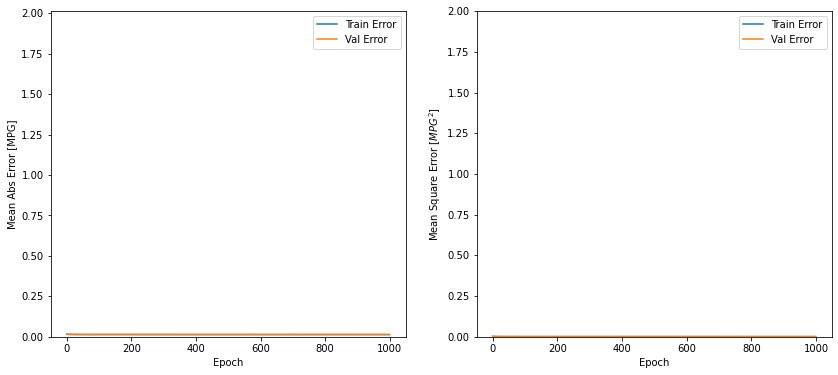

In [55]:
my_MLP.plot_history(hist_5MLP_minmax)

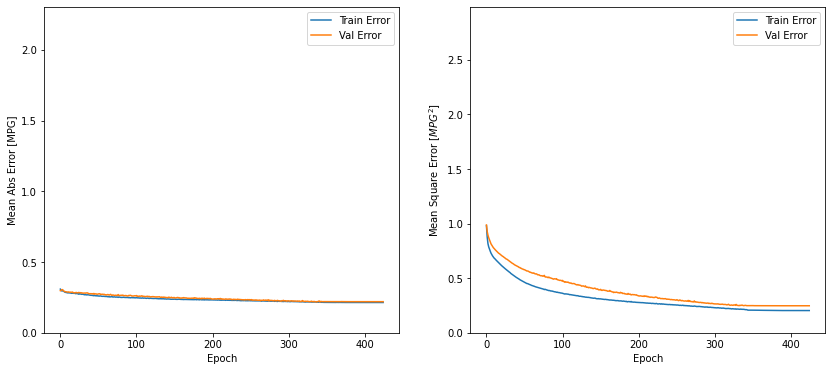

In [56]:
my_MLP.plot_history(hist_5MLP_std)

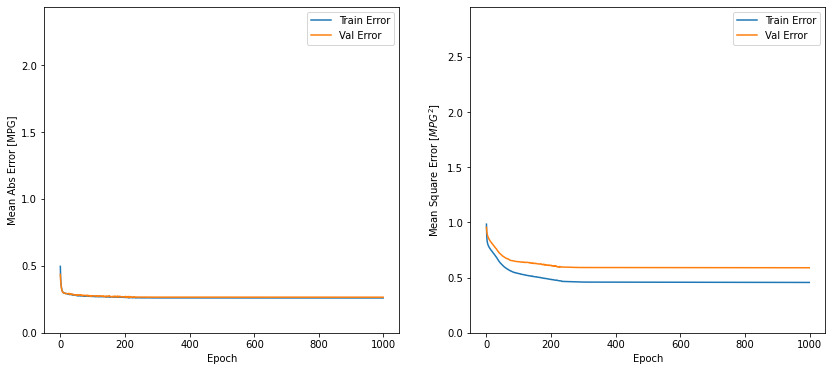

In [57]:
my_MLP.plot_history(hist_5MLP_pca)